## 1. Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
from wordcloud import WordCloud
from collections import Counter
import itertools

## 2. Load Dataset

In [3]:
skills = pd.read_csv("../data/raw/archive/job_skills.csv")
summary = pd.read_csv("../data/raw/archive/job_summary.csv")
posting = pd.read_csv("../data/raw/archive/linkedin_job_postings.csv")

# Merge dataset
df = (
    skills
    .merge(summary, on="job_link", how="left")
    .merge(posting, on="job_link", how="left")
)

## 3. Overview Dataset

In [4]:
df.head()

,job_link,job_skills,job_summary,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor...",Department:\nBuilding Custodial Services\nSala...,2024-01-19 09:45:09.215838+00,t,t,f,Housekeeper I - PT,Jacksonville State University,Metro Jacksonville,2024-01-12,Jacksonville,United States,Cleaner,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ...",Summary Of Key Responsibilities\nThis position...,2024-01-19 09:45:09.215838+00,t,t,f,Assistant General Manager - Huntington 4131,Ruby Tuesday,"Barboursville, WV",2024-01-13,West Virginia,United States,Clerk General,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis...",Make a difference every day by joining CCRES a...,2024-01-19 09:45:09.215838+00,t,t,f,School-based Behavior Analyst,CCRES Educational and Behavioral Health Services,"Boyertown, PA",2024-01-13,Exeter,United States,Consultant Education,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche...",Requisition ID: 271524\nRelocation Authorized:...,2024-01-19 09:45:09.215838+00,t,t,f,Electrical Deputy Engineering Group Supervisor,Energy Jobline,"Ogden, UT",2024-01-12,Layton,United States,Cleaner,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St...",Job Description\nProduction Specialist\nElectr...,2024-01-19 09:45:09.215838+00,t,t,f,Electrical Assembly Lead,Sanmina,"Pleasant Prairie, WI",2024-01-12,North Chicago,United States,Assembly Technician,Mid senior,Onsite


In [5]:
df.tail()

,job_link,job_skills,job_summary,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
1296376,https://www.linkedin.com/jobs/view/community-a...,"Communication Skills, Time Management, Custome...",Job Description\nThe Community Ambassador is a...,2024-01-21 17:37:17.240699+00,t,t,f,Community Ambassador - The Station at Raleigh,"Landmark Properties, Inc.","Raleigh, NC",2024-01-13,Durham,United States,Public-Relations Representative,Mid senior,Onsite
1296377,https://www.linkedin.com/jobs/view/sr-it-analy...,"Windows SQL, EDI X12, Edifecs Platform, Health...",Interested in fully remote opportunity as a Sr...,2024-01-21 17:37:18.018224+00,t,t,f,Sr. IT Analyst - Edifecs Technical Systems Ana...,Magellan Health,United States,2024-01-14,Smith Center,United States,Systems Analyst,Mid senior,Onsite
1296378,https://www.linkedin.com/jobs/view/operations-...,"Adaptability, Communication, Digital Fluency, ...",Entity:\nProduction & Operations\nJob Family G...,2024-01-21 17:37:18.098595+00,t,t,f,Operations Excellence Specialist,bp,"Chicago, IL",2024-01-14,La Grange,United States,Cargo Checker,Associate,Onsite
1296379,https://www.linkedin.com/jobs/view/float-patie...,"CNA, EMT, BLS, Medical Assistant, CPCT, LPN, R...","Overview To be part of our organization, every...",2024-01-21 17:37:19.417903+00,t,t,f,Float Patient Care Associate CSO YNHH,Yale New Haven Health,"New Haven, CT",2024-01-14,Derby,United States,Medical Assistant,Mid senior,Onsite
1296380,https://www.linkedin.com/jobs/view/conductor-e...,"Customer Service, Driving, Loading, Unloading,...",Conductor de entrega de autopartes de medio ti...,2024-01-21 17:37:21.080491+00,t,t,f,Conductor:Entrega a Domicilio - MT,AutoZone,"Vallejo, CA",2024-01-15,Petaluma,United States,Conductor,Mid senior,Onsite


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296381 entries, 0 to 1296380
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   job_link             1296381 non-null  object
 1   job_skills           1294296 non-null  object
 2   job_summary          1296381 non-null  object
 3   last_processed_time  1296381 non-null  object
 4   got_summary          1296381 non-null  object
 5   got_ner              1296381 non-null  object
 6   is_being_worked      1296381 non-null  object
 7   job_title            1296381 non-null  object
 8   company              1296372 non-null  object
 9   job_location         1296362 non-null  object
 10  first_seen           1296381 non-null  object
 11  search_city          1296381 non-null  object
 12  search_country       1296381 non-null  object
 13  search_position      1296381 non-null  object
 14  job_level            1296381 non-null  object
 15  job_type       

In [ ]:
# - Hanya kolom numerik (int/float) yang ditampilkan.
# - Kolom kategorikal (object/string) tidak ikut.

df.describe(include='all')

,job_link,job_skills,job_summary,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
count,1296381,1294296,1296381,1296381,1296381,1296381,1296381,1296381,1296372,1296362,1296381,1296381,1296381,1296381,1296381,1296381
unique,1296381,1287101,957570,722728,1,1,1,565695,88995,28791,6,1018,4,1923,2,3
top,https://www.linkedin.com/jobs/view/conductor-e...,"Front Counter, DriveThru, Outside Order Taker,...",Dollar General Corporation has been delivering...,2024-01-19 09:45:09.215838+00,t,t,f,LEAD SALES ASSOCIATE-FT,Health eCareers,"New York, NY",2024-01-14,North Carolina,United States,Account Executive,Mid senior,Onsite
freq,1,169,4565,573487,1296381,1296381,1296381,7315,40049,12580,459354,9495,1105410,19465,1155276,1285565


## 4. Missing Value Analysis

job_skills             2085
job_location             19
company                   9
job_link                  0
got_summary               0
got_ner                   0
job_summary               0
last_processed_time       0
job_title                 0
is_being_worked           0
first_seen                0
search_city               0
search_country            0
search_position           0
job_level                 0
job_type                  0
dtype: int64


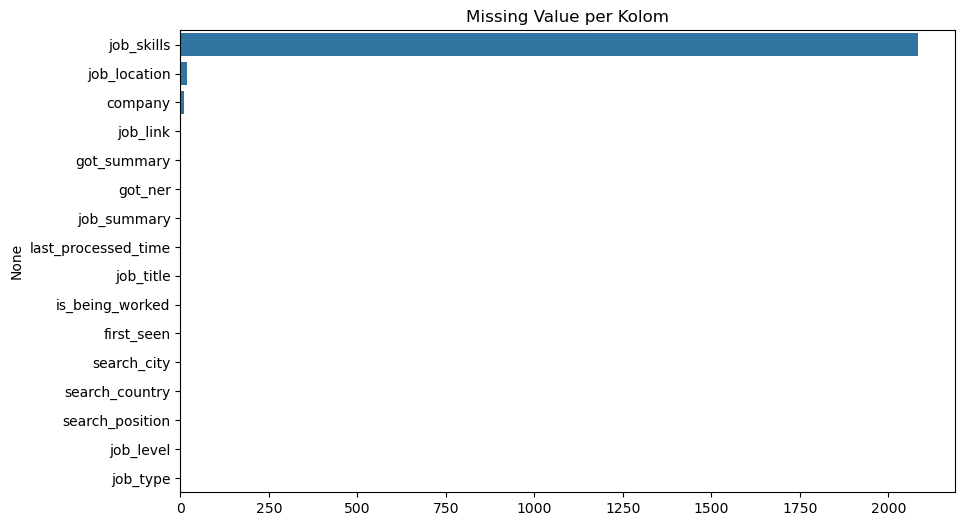

In [ ]:
# Cek Missing Values (data DESC)
missing = df.isnull().sum().sort_values(ascending=False)
print(missing)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing.values, y=missing.index)
plt.title("Missing Value per Kolom")
plt.show()

## 5. Job Role Landscape

job_title_clean
customer service representative                        9394
lead sales associate-ft                                7315
store manager                                          5687
shift manager                                          5531
first year tax professional                            5351
assistant manager                                      5253
lead sales associate-pt                                4911
registered nurse                                       4279
host                                                   2914
hourly supervisor & training                           2883
travel allied health professional - ct technologist    2717
account executive                                      2621
senior accountant                                      2511
restaurant manager                                     2291
veterinarian                                           2195
Name: count, dtype: int64


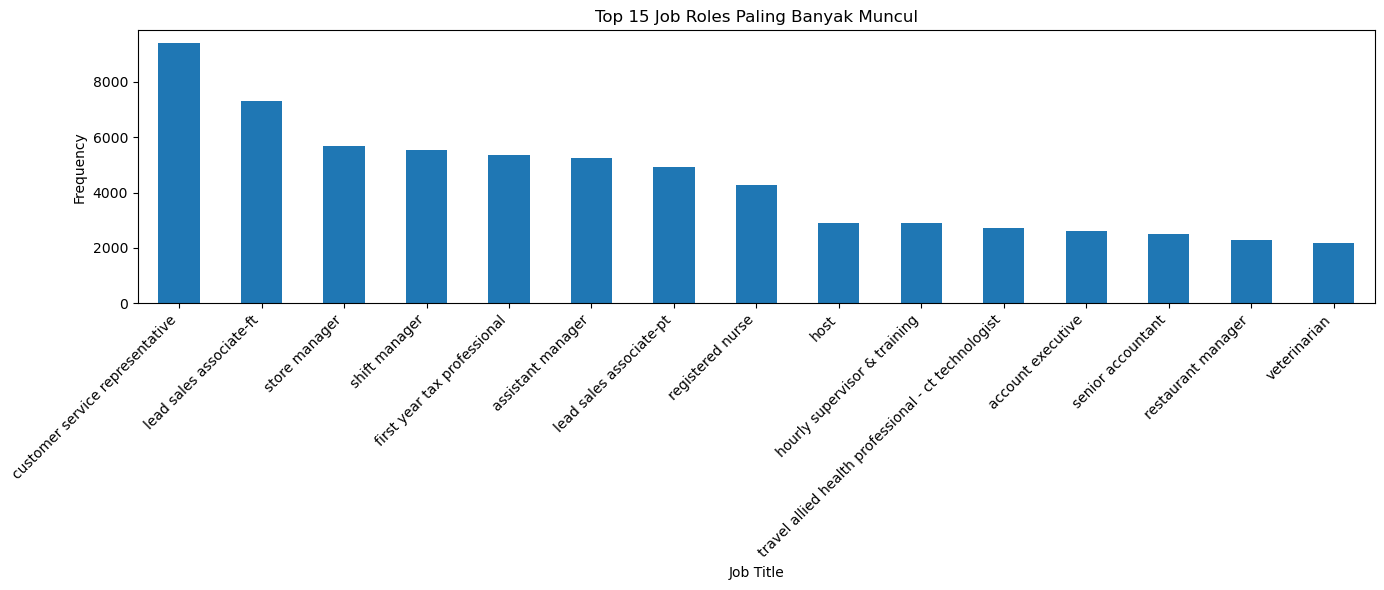

In [ ]:
# Normalisasi job_title dengan lowercase dan strip whitespace
df['job_title_clean'] = df['job_title'].fillna('').str.lower().str.strip()

# Hitung frekuensi dari job title yang sudah dinormalisasi
top_roles = df['job_title_clean'].value_counts().head(15)
print(top_roles)

# Visualisasi
# bar chart |  Mengatur ukuran gambar (14 inci lebar × 6 inci tinggi).
top_roles.plot(kind="bar", figsize=(14,6))

plt.title("Top 15 Job Roles Paling Banyak Muncul")
plt.xlabel("Job Title")
plt.ylabel("Frequency")

# Memutar teks 45 derajat (agar tidak saling tumpang tindih jika panjang). | rata kanan (teks miring akan “menyiku” rapi ke kanan).
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 6. Company Landscape

company_clean
health ecareers           40049
jobs for humanity         25629
travelnursesource         15997
dollar general            14775
practicelink               9044
energy jobline             8988
gotham enterprises ltd     8700
jobot                      8264
clearancejobs              8015
mcdonald's                 7742
volunteermatch             6653
walmart                    6455
doccafe                    6026
h&r block                  5668
circle k                   5493
Name: count, dtype: int64


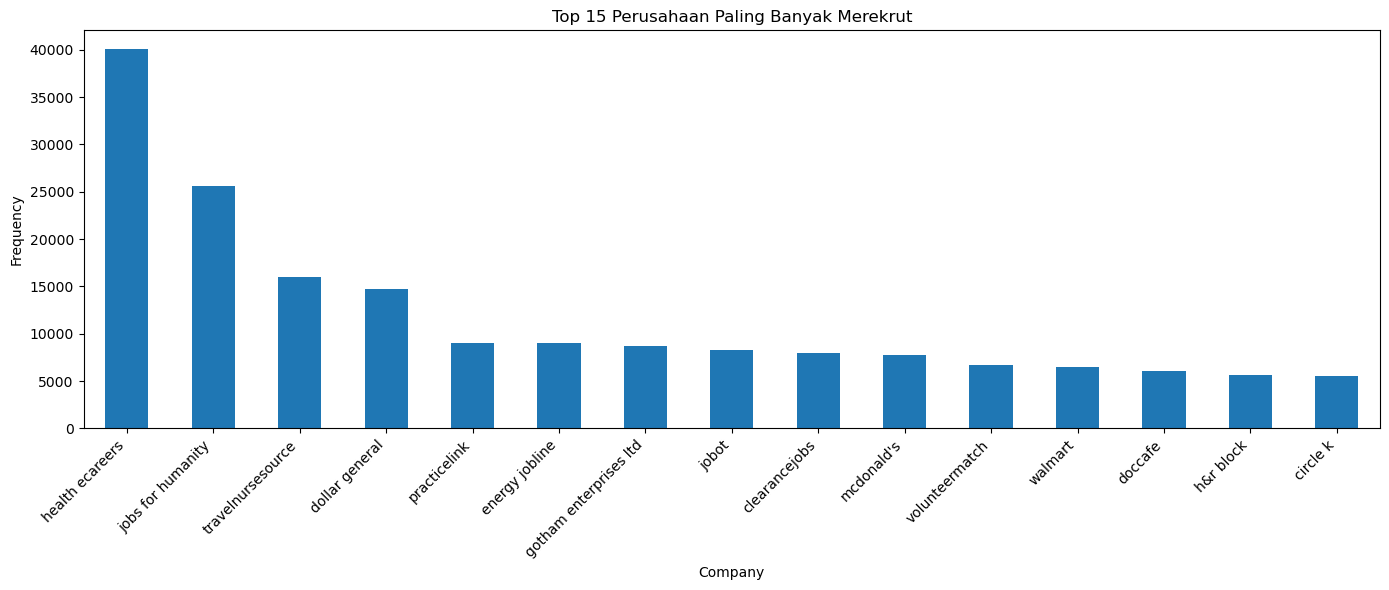

In [ ]:
# Normalisasi company name dengan lowercase dan strip whitespace
df['company_clean'] = df['company'].fillna('').str.lower().str.strip()

# Hitung frekuensi dari company yang sudah dinormalisasi
top_companies = df['company_clean'].value_counts().head(15)
print(top_companies)

# Visualisasi
# bar chart |  Mengatur ukuran gambar (14 inci lebar × 6 inci tinggi).
top_companies.plot(kind="bar", figsize=(14,6))

plt.title("Top 15 Perusahaan Paling Banyak Merekrut")
plt.xlabel("Company")
plt.ylabel("Frequency")

# Memutar teks 45 derajat (agar tidak saling tumpang tindih jika panjang). | rata kanan (teks miring akan “menyiku” rapi ke kanan).
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 7. Skill Distribution (Global)

communication             370143
customer service          278102
teamwork                  227609
communication skills      195949
leadership                185187
problem solving           149032
time management           142911
attention to detail       133975
problemsolving            129329
project management        121563
interpersonal skills      100267
patient care               99926
sales                      93031
nursing                    88015
collaboration              87116
training                   83656
data analysis              81964
microsoft office suite     75531
organizational skills      75274
inventory management       71911
high school diploma        67267
scheduling                 64461
bachelor's degree          63490
multitasking               62044
analytical skills          60768
microsoft office           60604
adaptability               59121
flexibility                56896
critical thinking          53081
documentation              51875
Name: coun

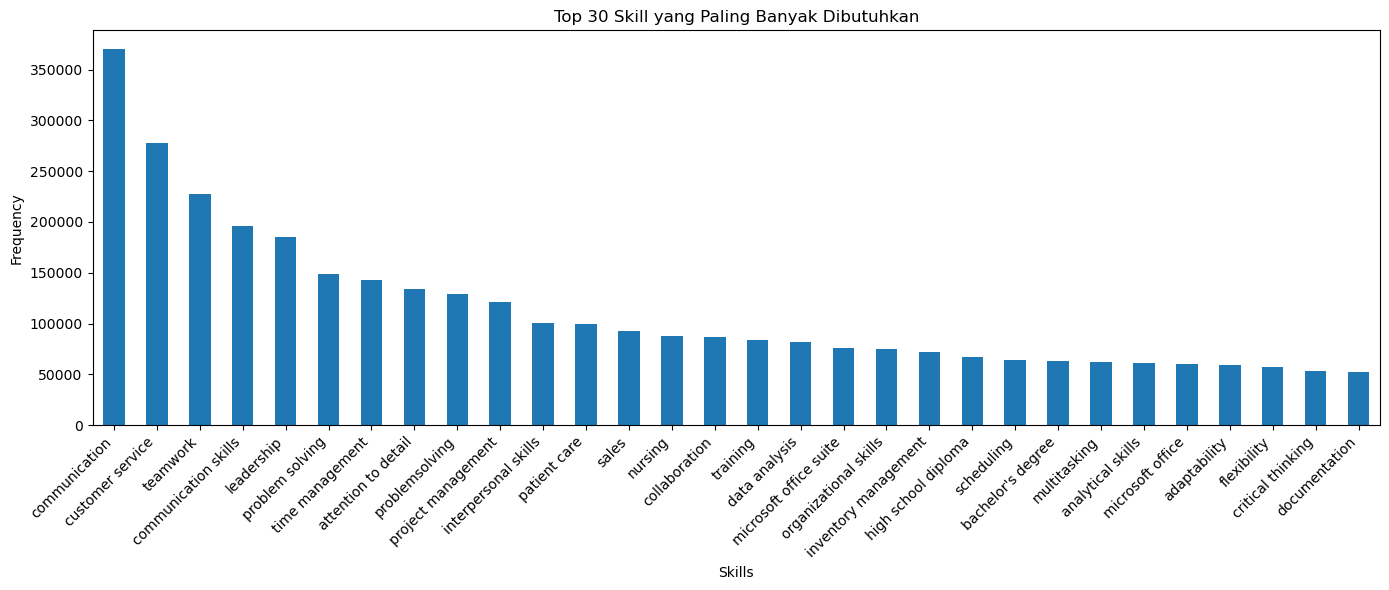

In [ ]:
# Normalisasi skill dengan lowercase dan strip whitespace
# mengganti nilai NaN (kosong/NULL) dengan string kosong '' | memecah string berdasarkan karakter koma (,) dan mengembalikan list kata untuk tiap sel.
df['skill_list'] = df['job_skills'].fillna('').str.lower().str.split(',')

# .apply memanggil fungsi Python untuk setiap nilai di Series. Karena tiap nilai sekarang adalah list, x adalah list (mis. ['python',' sql']).
df['skill_list'] = df['skill_list'].apply(lambda x: [skill.strip() for skill in x])

# Flatten dan hitung frekuensi
# Fungsi ini mengambil list berisi beberapa list → lalu menggabungkannya menjadi satu iterasi besar tanpa nested list.
all_skills = list(chain.from_iterable(df['skill_list']))

# Baris ini menghitung berapa kali setiap skill muncul.
skill_freq = pd.Series(all_skills).value_counts()

print(skill_freq.head(30))

# Visualisasi
# bar chart |  Mengatur ukuran gambar (14 inci lebar × 6 inci tinggi).
skill_freq.head(30).plot(kind='bar', figsize=(14,6))

plt.title("Top 30 Skill yang Paling Banyak Dibutuhkan")
plt.xlabel("Skills")
plt.ylabel("Frequency")

# Memutar teks 45 derajat (agar tidak saling tumpang tindih jika panjang). | rata kanan (teks miring akan “menyiku” rapi ke kanan).
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 8. Skill Per Job Role (NO FILTER)

In [ ]:
# 10 job role teratas berdasarkan jumlah kemunculan.
top_10_roles = df['job_title_clean'].value_counts().head(10).index

# Looping setiap role teratas satu per satu.
for role in top_10_roles:
    # Title job
    subset = df[df['job_title_clean'] == role]

    # meratakan list skill dari setiap baris
    flat = list(chain.from_iterable(subset['skill_list']))
    
    # Menghitung skill yang paling sering muncul dari role tersebut
    top_sk = pd.Series(flat).value_counts().head(10)

    # Output
    print("\n================================================")
    print("Top Skill untuk Job Role:", role)
    print("================================================")
    print(top_sk)


Top Skill untuk Job Role: customer service representative
customer service                     8873
communication                        4893
problem solving                      4171
retail experience                    3889
communication skills                 3338
teamwork                             3182
high school diploma or equivalent    2634
problemsolving                       2572
retail operations                    2491
relationship management              2419
Name: count, dtype: int64

Top Skill untuk Job Role: lead sales associate-ft
customer service             7015
supervisory experience       6608
mathematical calculations    5753
high school diploma          4917
cash handling                4818
driving                      4711
cash register operation      4409
fastpaced environment        4225
cleaning                     3387
planogram implementation     3383
Name: count, dtype: int64

Top Skill untuk Job Role: store manager
customer service        4505
communic

## 9. WordCloud Job Summary (Raw)

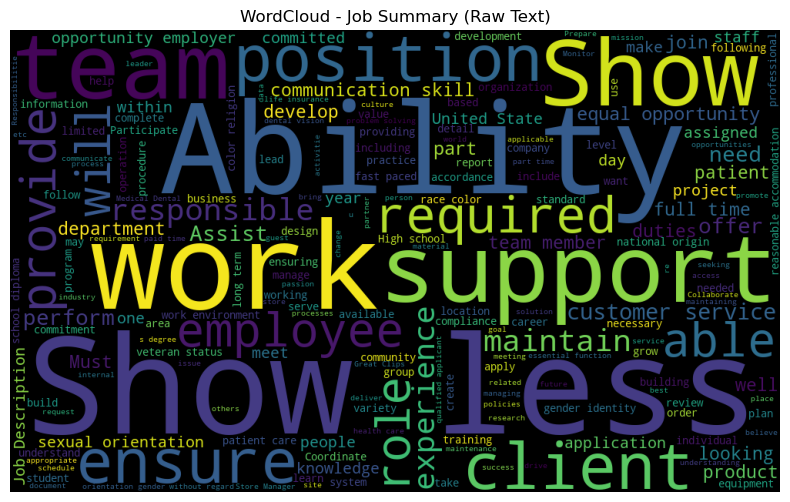

In [13]:
text = " ".join(df['job_summary'].dropna().head(20000).tolist())

wc = WordCloud(width=1000, height=600).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis('off')
plt.title("WordCloud - Job Summary (Raw Text)")
plt.show()

## 10. Distribusi Panjang Job Description

count    1.296381e+06
mean     3.818551e+03
std      2.302560e+03
min      2.100000e+01
25%      2.211000e+03
50%      3.382000e+03
75%      4.927000e+03
max      2.374800e+04
Name: desc_len, dtype: float64


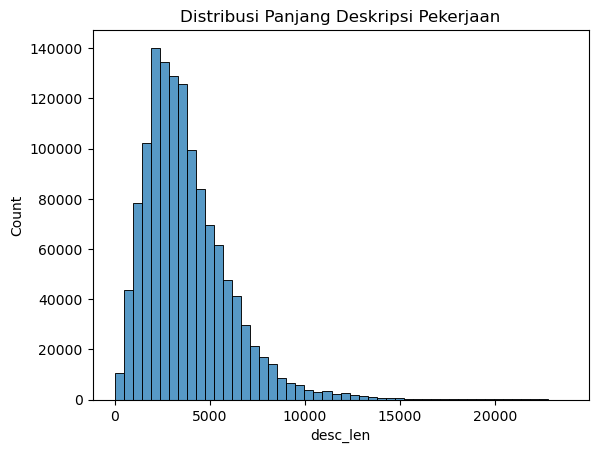

In [14]:
df['desc_len'] = df['job_summary'].astype(str).apply(len)

print(df['desc_len'].describe())

sns.histplot(df['desc_len'], bins=50)
plt.title("Distribusi Panjang Deskripsi Pekerjaan")
plt.show()

## 11. Analisis Job Level (Entry / Mid / Senior)

In [17]:
df['level_flag'] = df['job_title'].str.extract('(Senior|Junior|Lead|Manager|Entry)', expand=False)
df['level_flag'].value_counts()

level_flag
Manager    229915
Senior      94565
Lead        53661
Entry        1981
Junior       1830
Name: count, dtype: int64

12. Skill Co-occurrence (Cluster skill otomatis)

In [16]:
pairs = Counter()

for skills_ in df['skill_list']:
    comb = itertools.combinations(sorted(set(skills_)), 2)
    pairs.update(comb)

pairs.most_common(20)

[(('communication', 'teamwork'), 139183),
 (('communication', 'customer service'), 139042),
 (('communication', 'leadership'), 117179),
 (('communication', 'problem solving'), 94142),
 (('customer service', 'teamwork'), 90988),
 (('communication', 'problemsolving'), 89751),
 (('communication', 'time management'), 84268),
 (('customer service', 'leadership'), 66520),
 (('attention to detail', 'communication'), 65718),
 (('leadership', 'teamwork'), 64388),
 (('problemsolving', 'teamwork'), 63773),
 (('teamwork', 'time management'), 62045),
 (('customer service', 'sales'), 61658),
 (('attention to detail', 'teamwork'), 58435),
 (('customer service', 'time management'), 56627),
 (('problem solving', 'teamwork'), 56025),
 (('customer service', 'problem solving'), 54943),
 (('communication', 'sales'), 54224),
 (('customer service', 'problemsolving'), 51832),
 (('collaboration', 'communication'), 51380)]